In [1]:
# データ分析・操作用ライブラリ
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import itertools

# NLP用ライブラリ
from wordcloud import WordCloud
import MeCab,re
from sklearn.feature_extraction.text import TfidfVectorizer

# その他
import glob

In [2]:
# 形態素解析用関数
def tokenize(text,wordClassList):
    tokens = []
    tagger = MeCab.Tagger( "-Ochasen" )
    node = tagger.parseToNode(text)
    while node:
        if node.feature.split(",")[0] in wordClassList :
                replace_node = re.sub( re.compile( "[!-/:-@[-`{-~]" ), "", node.surface )
                if replace_node != "" and replace_node != " ":
                    tokens.append(replace_node)
        node = node.next
    return tokens

In [3]:
# CSVの読み込み
wikiData = pd.read_csv("csv/train.csv", encoding="utf-8")

# クラス名の取得
fileNames = glob.glob('xml/*')
classList = []
for file in fileNames:
    classList.append(file[4:])

# 読み込みデータの表示
wikiData.head()

text  target
0   ドール・フード・カンパニー  ドール・フード・カンパニー（Dole Food Compan...       1
1   南ヶ丘牧場  株式会社 南ヶ丘牧場（みなみがおかぼくじょう）は、栃木県那須高原に本拠を置く...       1
2   岩瀬牧場  岩瀬牧場（いわせぼくじょう）は、日本の福島県岩瀬郡鏡石町にある牧場である。  ...       1
3   クラギ  クラギ株式会社（くらぎ、"KURAGI Co.Ltd." ）は、三重県を中心に「...       1
4   ハッピーネモファーム  株式会社ハッピーネモファーム（""）は、北海道浦河郡浦河町にある競...       1

# データ数の確認

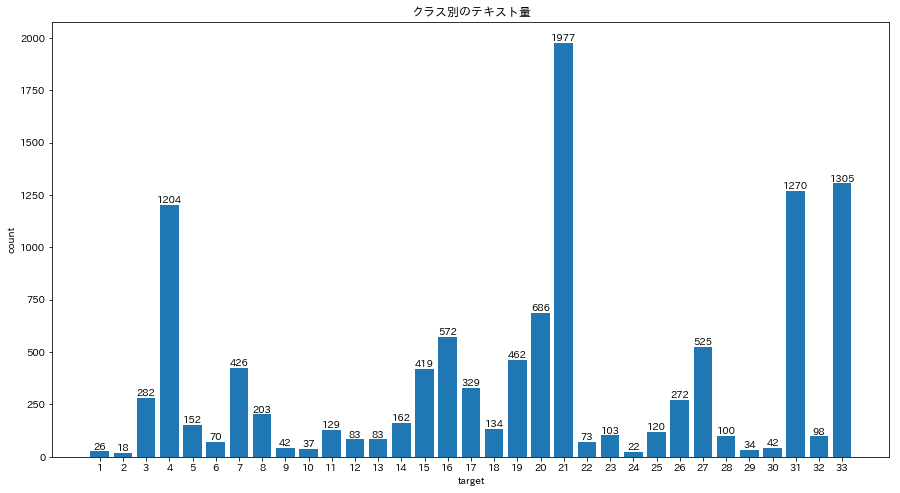

In [4]:
# クラス別のテキスト量を確認
wiki_gpby = wikiData.groupby('target').count()
y = wiki_gpby['text'].values
x =wiki_gpby.index.values

plt.figure(figsize=(15, 8))
plt.title("クラス別のテキスト量")
plt.xlabel("target")   
plt.ylabel("count")
plt.xticks(x)
plt.bar(x, y)

# 棒グラフ内に数値を書く
for x, y in zip(x, y):
    plt.text(x, y, y, ha='center', va='bottom')
    
plt.show()

・サンプル数にばらつきがある。最も少ないクラスは18個しか存在せず、学習するのに十分な数があるとは言えない

・不均衡データである為ダウンサンプリングも選択肢の一つだが、数が著しく少ないクラスが多く、学習データが少なくなりすぎそう

# WordCloud

In [5]:
# ストップワードの読み込み
path = "data/Slothlib.txt"
stopWords = []
with open(path, encoding="utf-8") as f:
    stopWords = [s.strip() for s in f.readlines()]

In [6]:
# 全テキストの結合
allText = ''
for text in wikiData['text'].values:
    allText += ''.join(text)

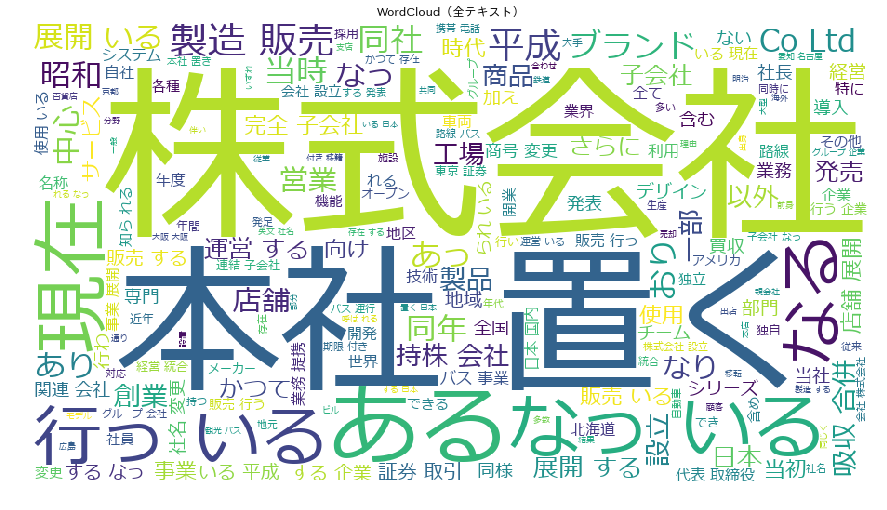

In [7]:
# 形態素解析
wordClassList = ['形容詞', '動詞','名詞', '副詞']
words = tokenize(allText,wordClassList)
words_joined = ' '.join(words)

# WordCloud
fpath = 'C:\Windows\Fonts\Meiryo UI\meiryo.ttc'
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, stopwords=set(stopWords)).generate(words_joined)

plt.figure(figsize=(15,12))

plt.title("WordCloud（全テキスト）")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

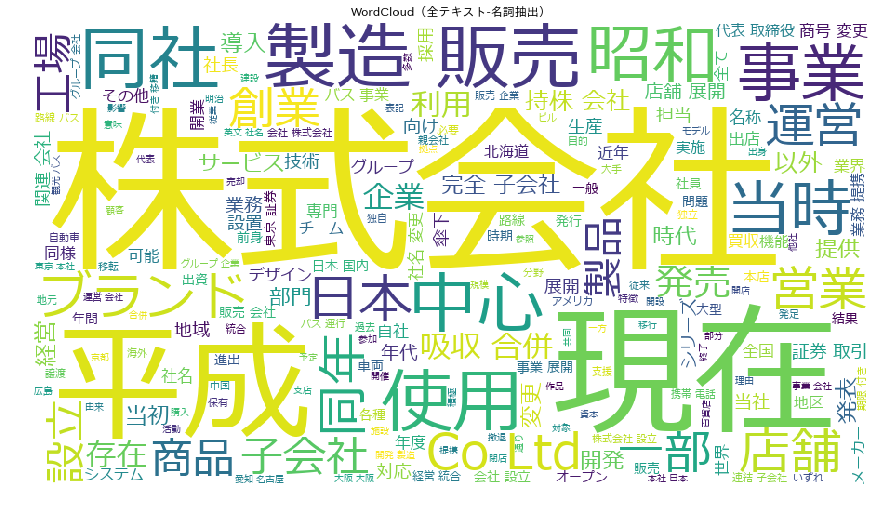

In [8]:
# 名詞のみ抽出
wordClassList = ['名詞']
words = tokenize(allText,wordClassList)
noun_joined = ' '.join(words)

# WordCloud
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, stopwords=set(stopWords)).generate(noun_joined)

plt.figure(figsize=(15,12))
plt.title("WordCloud（全テキスト-名詞抽出）")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

・'株式会社'、'同社'、'CO Ltd'など、どの業種でも出てくる単語や'平成'、'昭和'、'同年'、'当時'などの時を示す単語が多い。削除候補。

・'製造'、'販売'などの単語を名詞として抜けるようなので、動詞はいらなそう

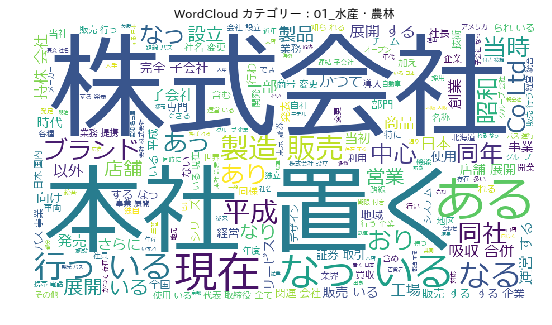

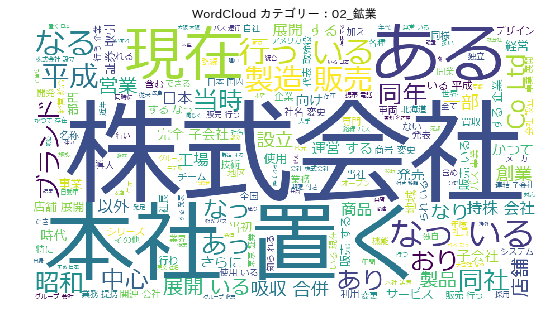

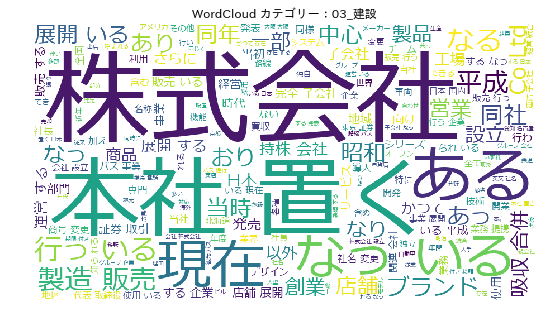

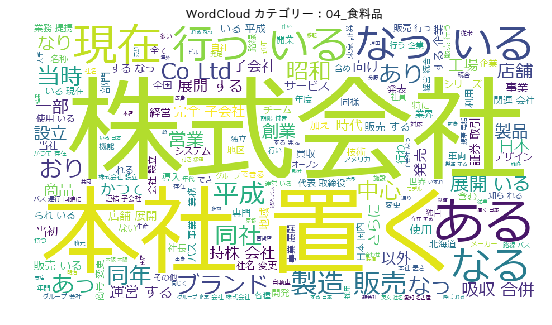

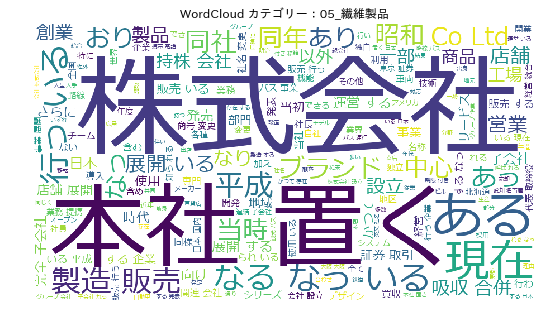

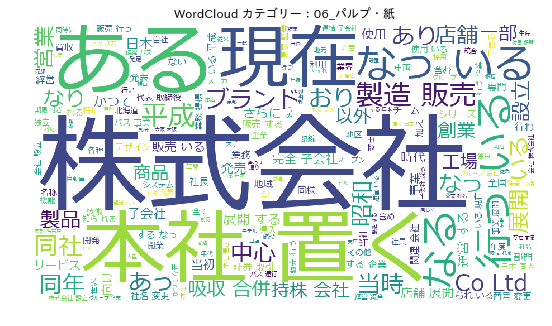

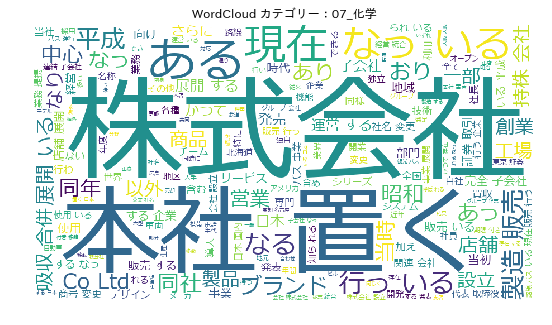

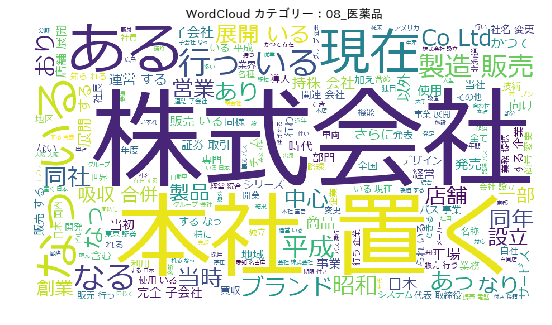

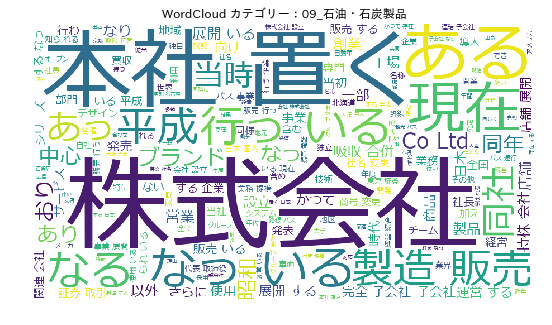

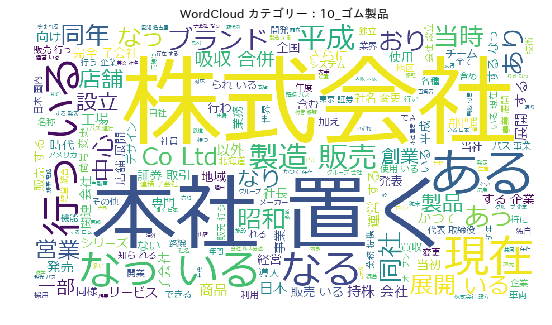

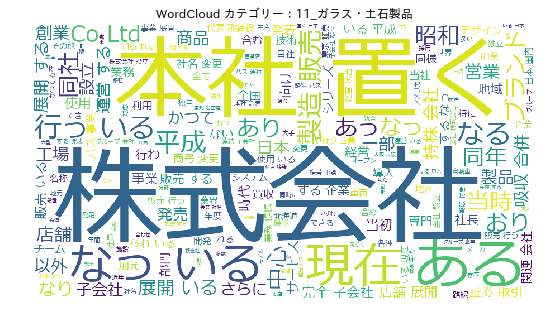

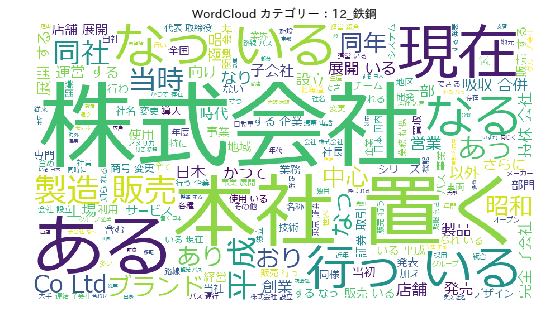

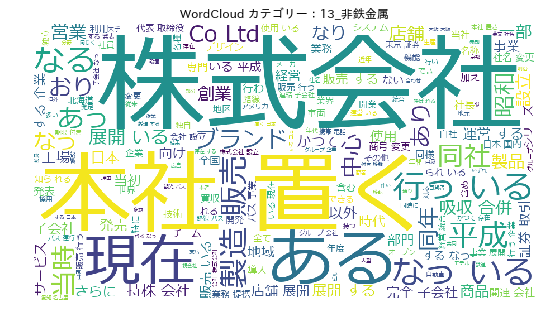

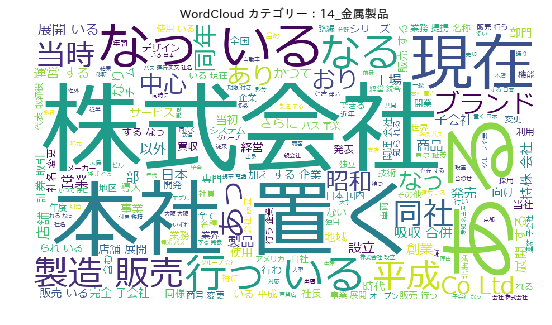

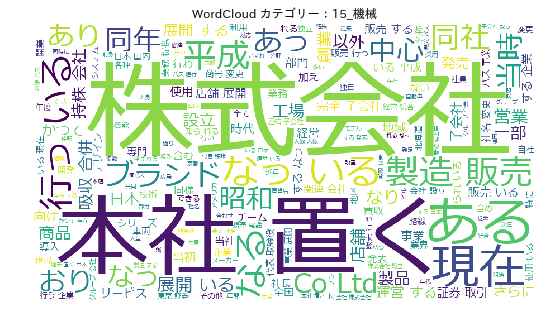

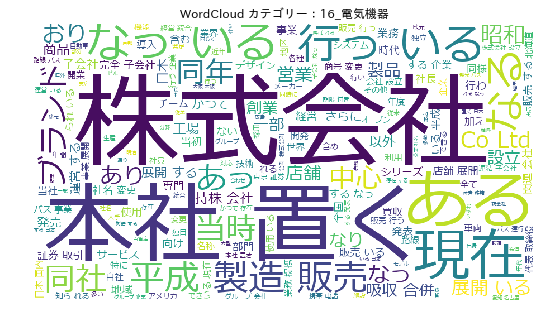

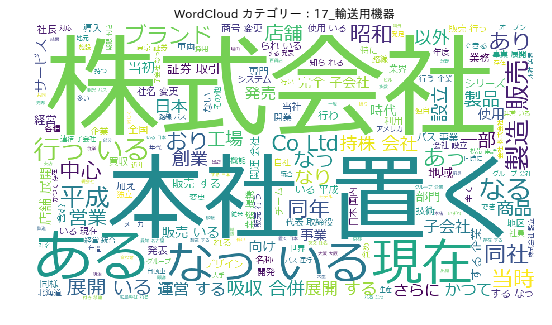

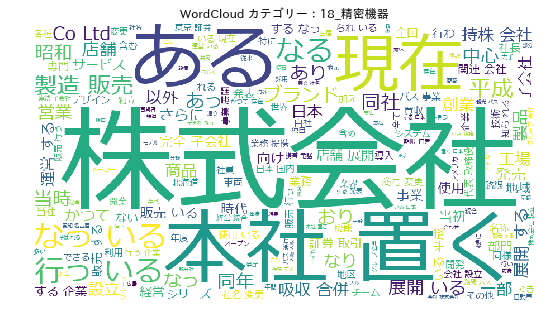

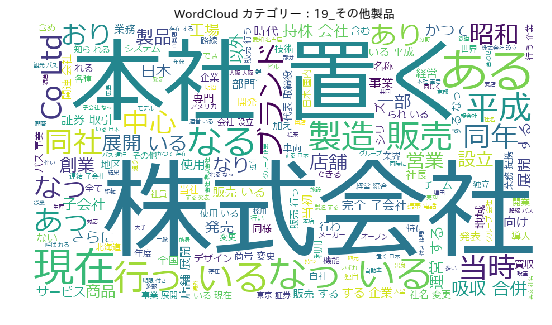

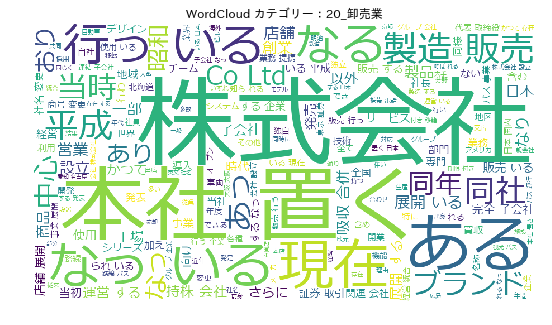

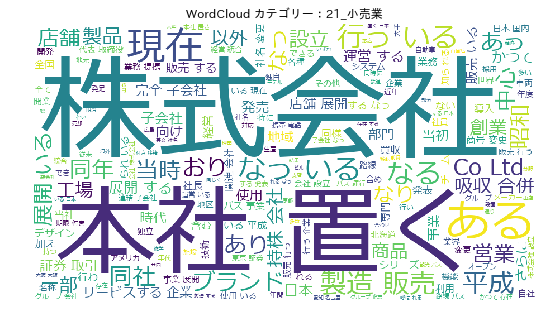

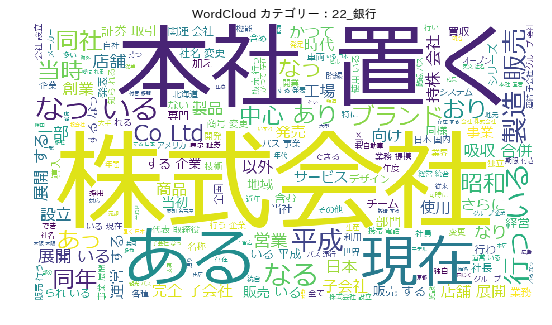

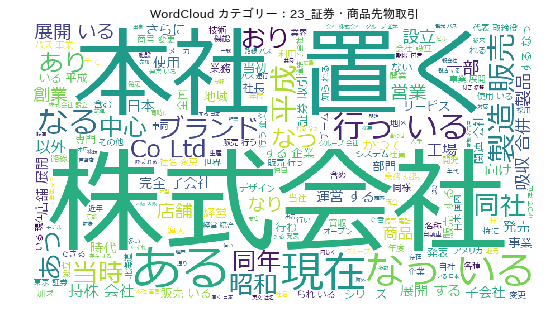

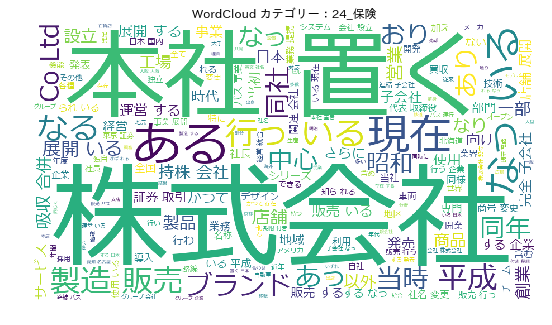

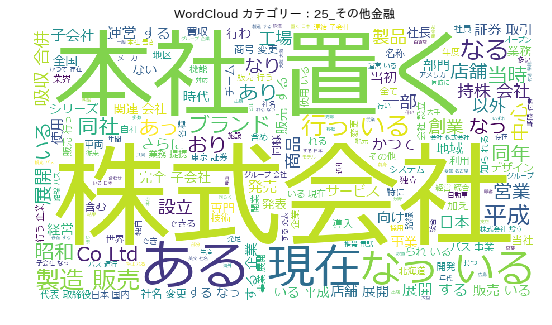

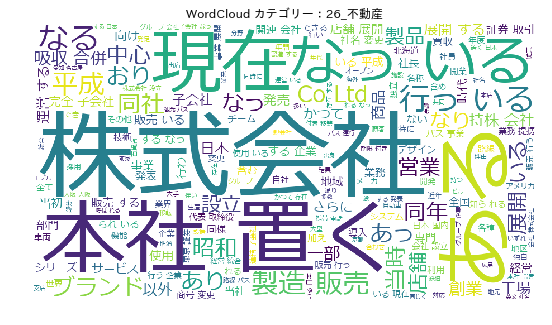

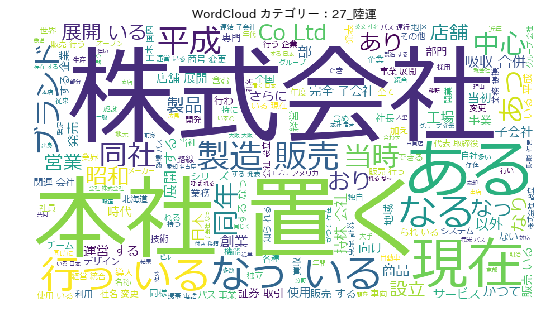

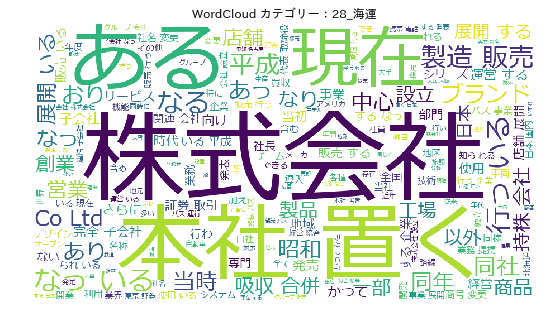

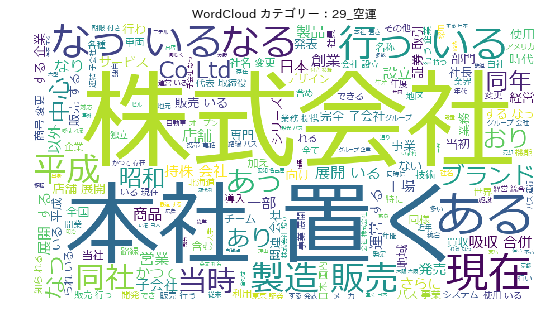

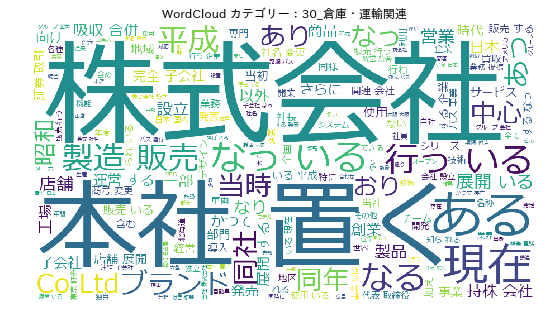

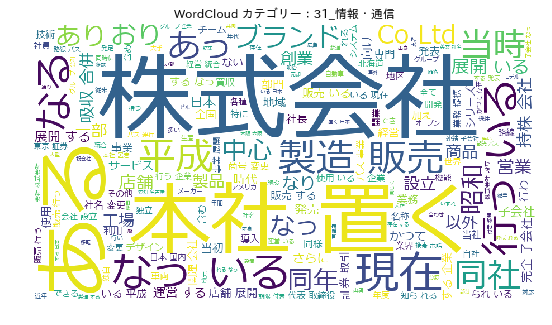

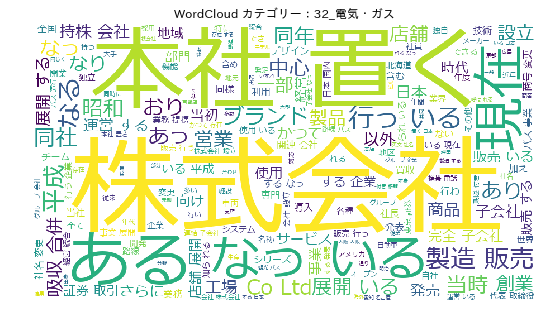

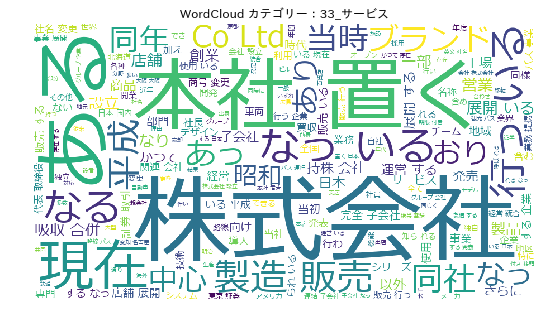

In [9]:
# カテゴリー別に表示
targetText = ''
for i in range(1,34):
    targetData = wikiData[wikiData['target'] == i]
    
    for text in targetData['text'].values:
        targetText += "".join(text)
    
    # 形態素解析
    wordClassList = ['形容詞', '動詞','名詞', '副詞']
    words = tokenize(allText,wordClassList)
    words_joined = ' '.join(words)
    
    # WordCloud
    wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, stopwords=set(stopWords)).generate(words_joined)

    plt.figure(figsize=(9,6))
    plt.title("WordCloud カテゴリー：" + classList[i-1])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    targetText = ''


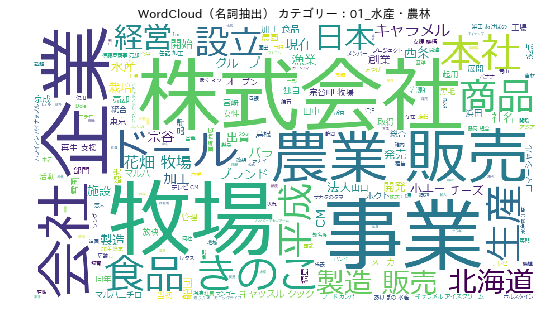

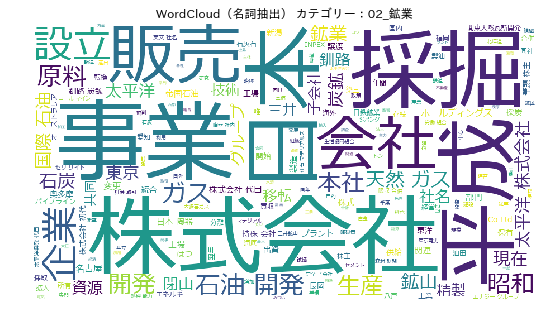

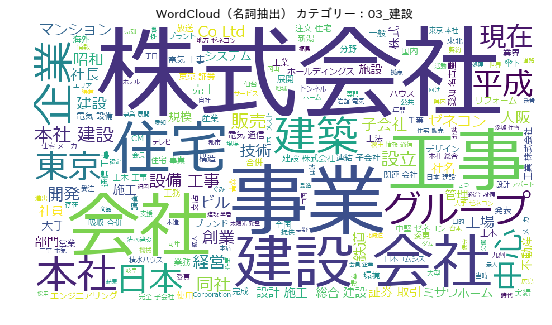

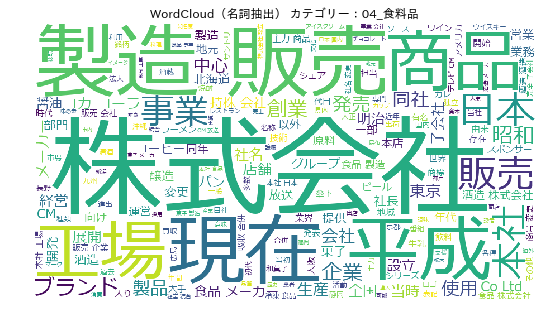

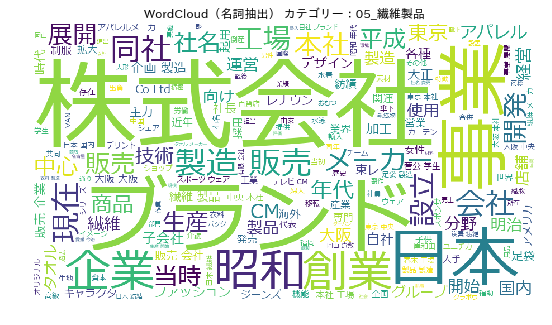

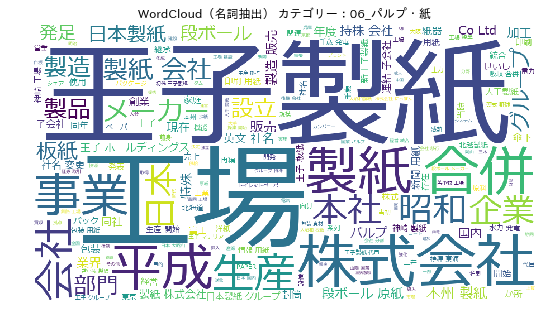

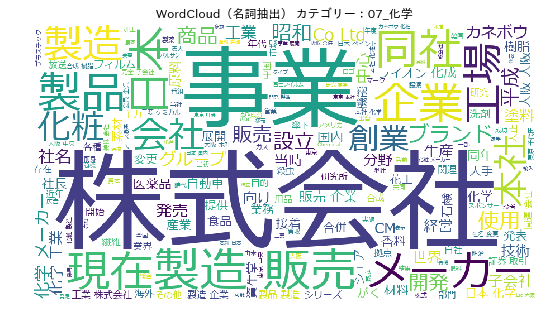

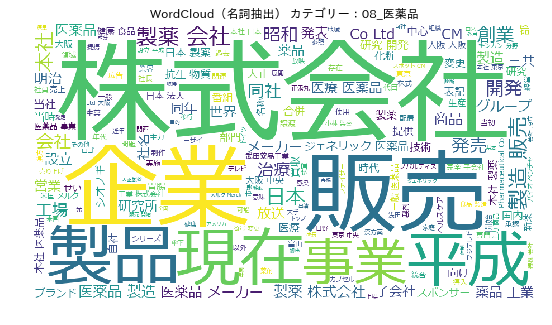

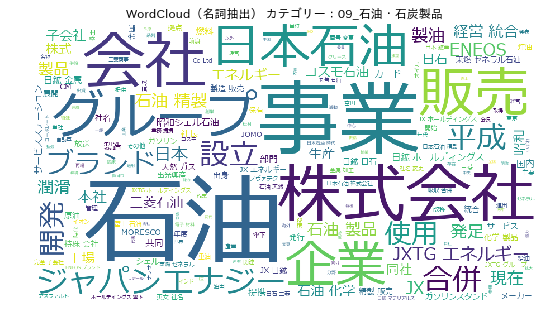

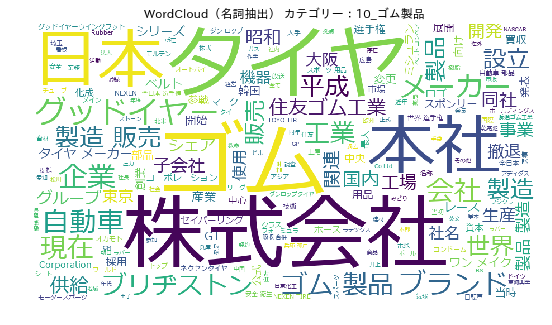

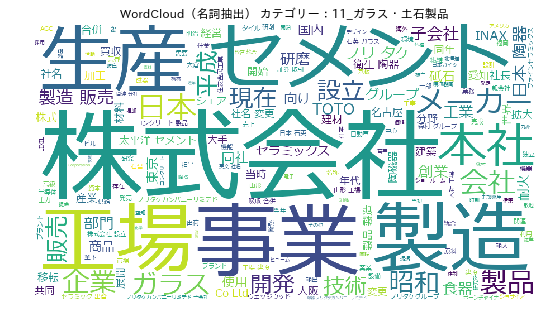

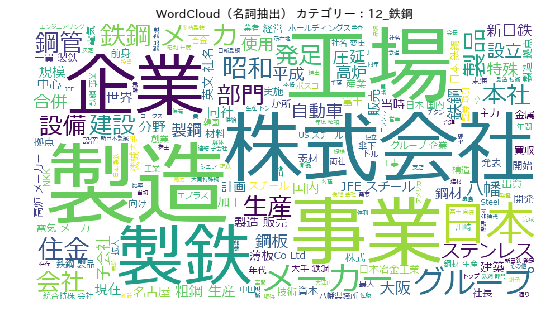

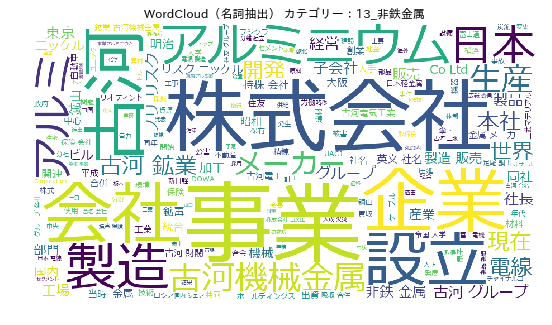

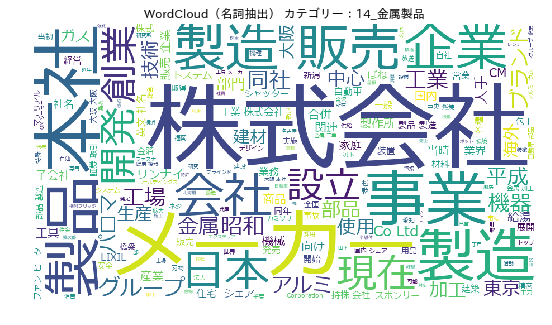

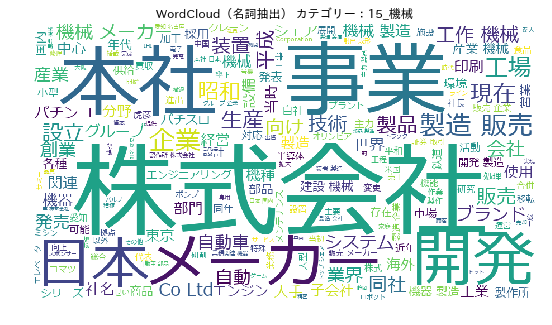

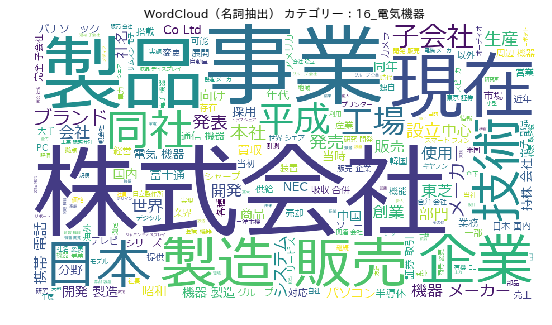

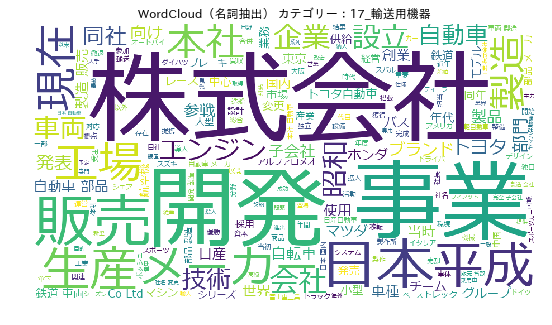

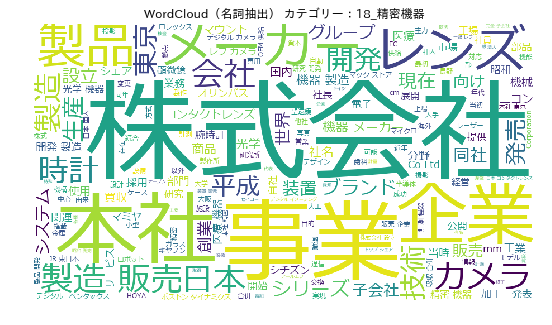

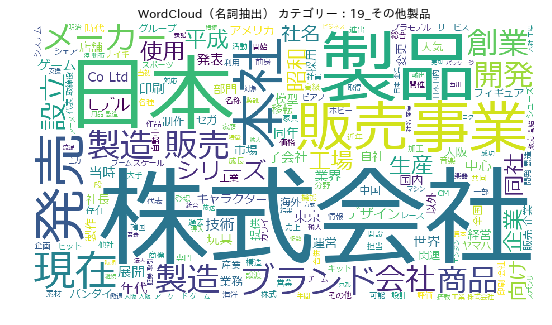

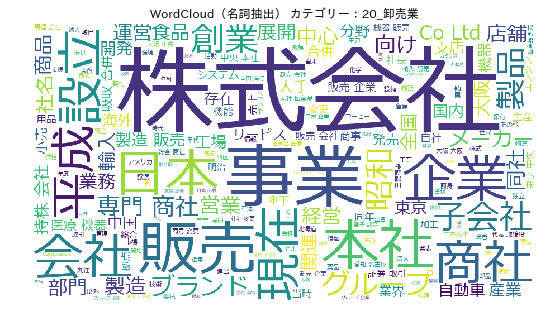

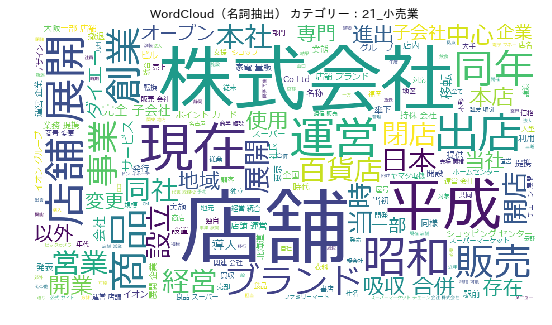

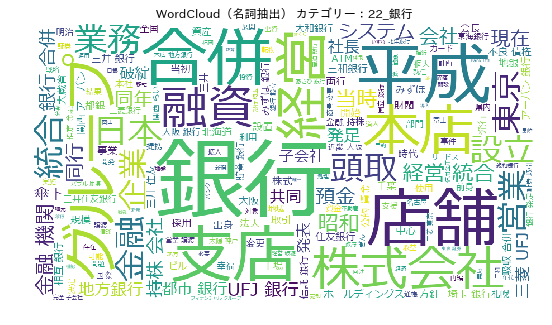

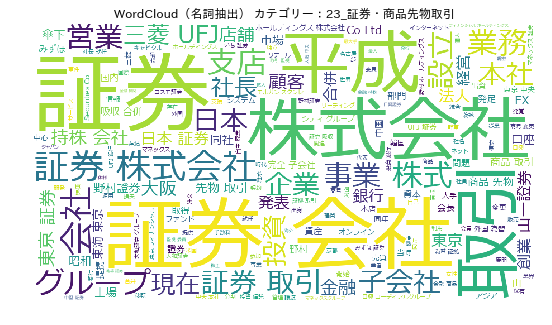

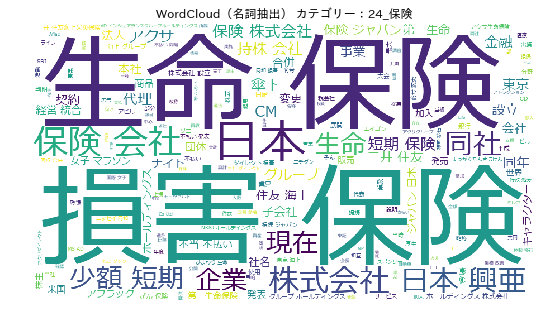

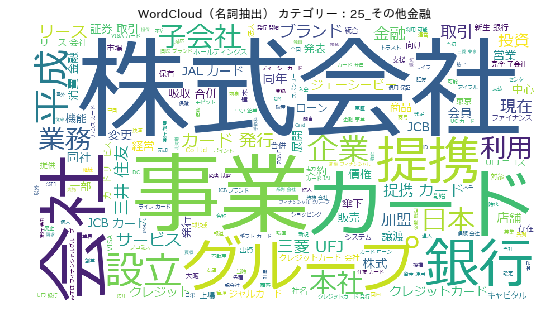

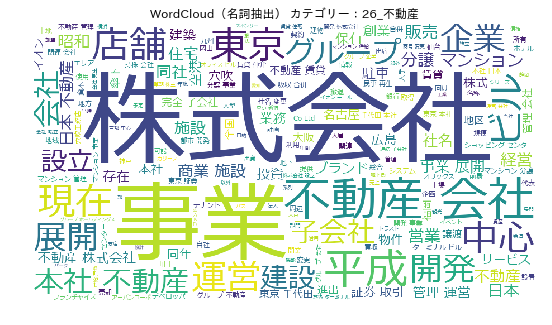

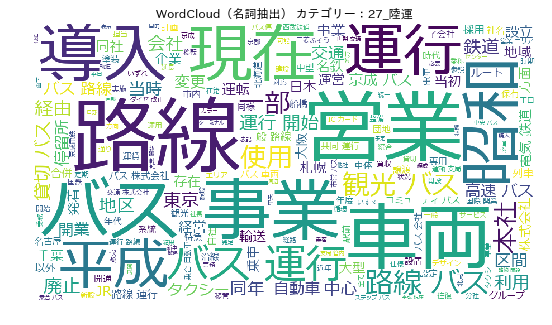

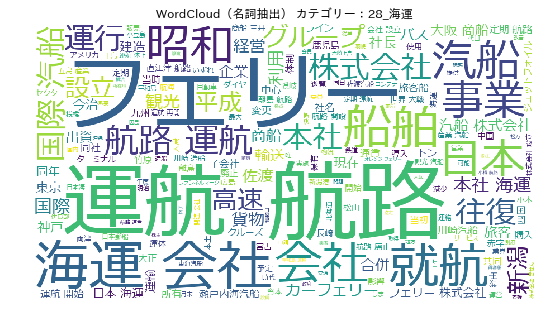

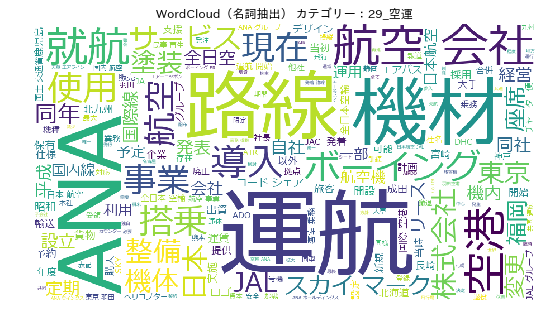

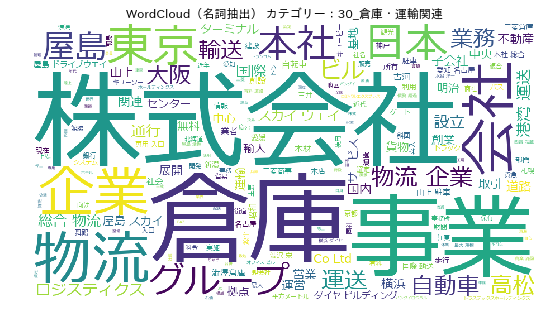

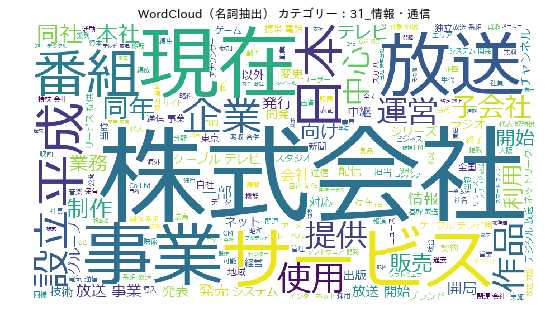

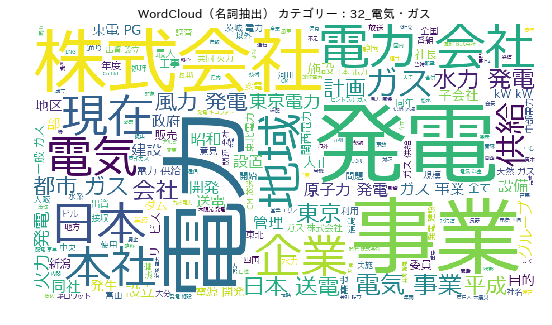

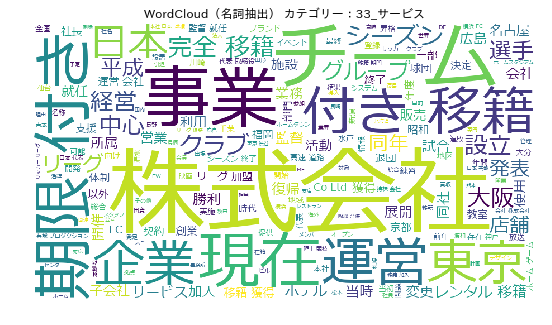

In [10]:
# カテゴリー別に表示
targetText = ' '
for i in range(1,34):
    targetData = wikiData[wikiData['target'] == i]
    for text in targetData['text'].values:
        targetText += ''.join(text)
    
    # 名詞のみ抽出
    wordClassList = ['名詞']
    targetWords = tokenize(targetText,wordClassList)
    noun_joined = ' '.join(targetWords)
    
    # WordCloud
    wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, stopwords=set(stopWords)).generate(noun_joined)

    plt.figure(figsize=(9,6))
    plt.title("WordCloud（名詞抽出） カテゴリー：" + classList[i-1])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    targetText = ''